
<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Informática II

 </center></font></h1>
<h2><font color='0B5345'> <center>
Parcial II: Computación numérica en python</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>




Nombre: Luciana  Estrada García

Cédula: 1011510628


Antes de iniciar leer cuidadosamente cada enunciado antes de responder y asegurarse de comprender completamente lo que se está solicitando. 

¡Buena suerte!

1. (50%) La electromiografía (EMG) es una técnica ampliamente utilizada en medicina y fisiología para estudiar la actividad eléctrica de los músculos. Esta actividad, conocida como electromiograma (EMG), se registra mediante electrodos colocados sobre la piel o dentro del músculo, y proporciona información valiosa sobre el funcionamiento del sistema neuromuscular.

Instrucciones:

Utilizando programación orientada a objetos, cargue dos archivos de señales de EMG que contenga datos de varios electrodos (canales).

- Cree un método que muestre la información de la señal, que describa la forma de la señal y sus dimensiones (ejemplo: número de puntos de tiempo y el número de canales)

- Defina un método que sea capaz de graficar cada par de canales de EMG en un subplot con un tamaño adecuado. El número de canales es par, por lo tanto debe organizar los subplots en una matriz de dimensiones (numerodecanales/2, numerodecanales/2). Cada canal debe tener un color distinto en el gráfico.

- Los gráficos deben tener títulos, labels, cuadrícula, nombres en los ejes y cambios en el grosor de la línea.
- Debe permitir al usuario ingresar los límites del eje x a graficar.
- En este caso el gráfico es datos vs tiempo

- Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.

- Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo. Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.

In [3]:
import scipy.io as sio
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import glob

In [4]:

carga_1 = r"C:\info_2\parcial_2\archivo1.mat"
archivo_1 = sio.loadmat(carga_1) #asigna el contenido de ese archivo en el PATH #loadmath carga un archivo .mat
print(f'La variable 1 cargada es del tipo: {type(archivo_1)}') #tipo de datos es diccionario en este caso 
print(f'las llaves son: {archivo_1.keys()}') #como se que es un diccionario, voy a pedirle las llaves

carga_2 = r"C:\info_2\parcial_2\archivo2.mat"
archivo_2 = sio.loadmat(carga_2) #asigna el contenido de ese archivo en el PATH #loadmath carga un archivo .mat
print(f'La variable 2 cargada es del tipo: {type(archivo_2)}') #tipo de datos es diccionario en este caso 
print(f'las llaves son: {archivo_2.keys()}') #como se que es un diccionario, voy a pedirle las llaves

#los datos estan en la ultima clave [-1]

La variable 1 cargada es del tipo: <class 'dict'>
las llaves son: dict_keys(['__header__', '__version__', '__globals__', 'tiempo', 'datos'])
La variable 2 cargada es del tipo: <class 'dict'>
las llaves son: dict_keys(['__header__', '__version__', '__globals__', 'tiempo', 'datos'])


Datos cargados exitosamente.
------Información de la señal----- 
Número de canales: 8
Puntos de tiempo: 63196
Forma de la señal: (8, 63196)


---Limites del eje x-----


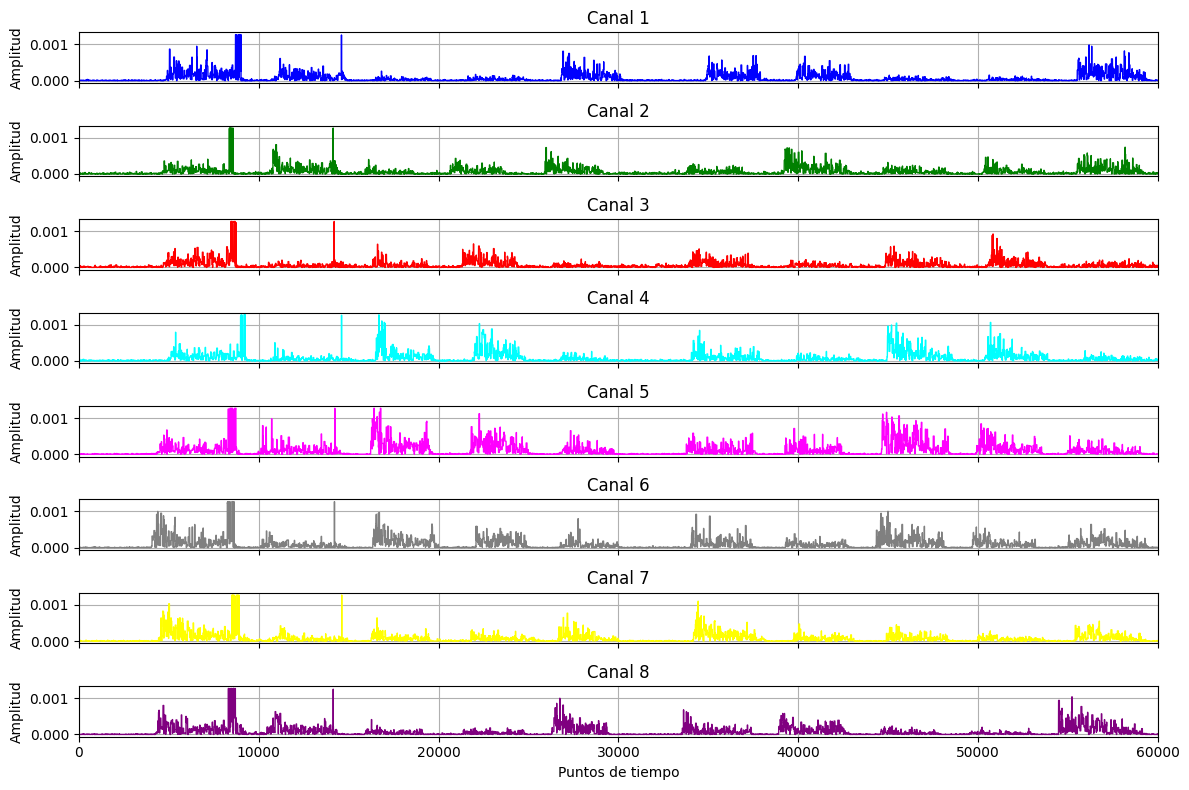

-----Archivo 1------
Para el canal 1:
   Índice del valor máximo: 9160
   Valor máximo: 0.00127
Para el canal 2:
   Índice del valor máximo: 9205
   Valor máximo: 0.00127
Para el canal 3:
   Índice del valor máximo: 9160
   Valor máximo: 0.00127
Para el canal 4:
   Índice del valor máximo: 9242
   Valor máximo: 0.00127
Para el canal 5:
   Índice del valor máximo: 9220
   Valor máximo: 0.00127
Para el canal 6:
   Índice del valor máximo: 9220
   Valor máximo: 0.00127
Para el canal 7:
   Índice del valor máximo: 9205
   Valor máximo: 0.00127
Para el canal 8:
   Índice del valor máximo: 9160
   Valor máximo: 0.00127
-----Archivo 2------
Para el canal 1:
   Índice del valor máximo: 9765
   Valor máximo: 0.00112
Para el canal 2:
   Índice del valor máximo: 9765
   Valor máximo: 0.00127
Para el canal 3:
   Índice del valor máximo: 21780
   Valor máximo: 0.00069
Para el canal 4:
   Índice del valor máximo: 21473
   Valor máximo: 0.00119
Para el canal 5:
   Índice del valor máximo: 21473
   Va

C:\Users\lucia\AppData\Local\Temp\ipykernel_7860\3449623410.py:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(promedio,'r', color='black', linewidth=2)


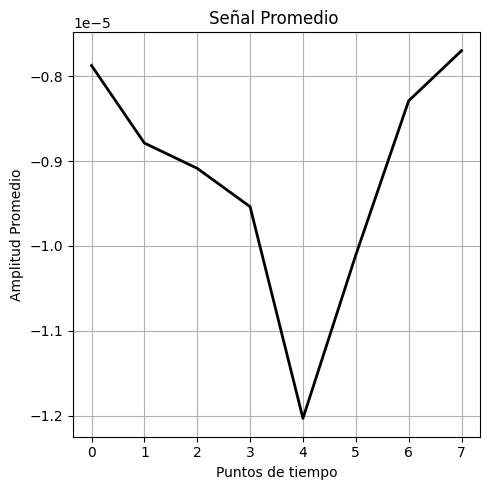

In [5]:
import scipy.io as sio
import numpy as np

class EMG:
    def __init__(self):
        self.data=[] 
        self.colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'gray', 'yellow','purple']
        self.num_canales= None
        self.num_ptiempo= None 

    def cargar_datos(self, archivos):

        archivo1 = sio.loadmat(archivos[0])
        data1 = archivo1[list(archivo1.keys())[-1]] #data es un atributo de instancia de EMG y ya está asociado con self. por eso no se pone self.data como el ejercicio de la profe
        self.data.append(data1)


        archivo2 = sio.loadmat(archivos[1])
        data2 = archivo2[list(archivo2.keys())[-1]] #despues de cargar. se accede a la ulitma matriz del diccionario, porque ahi estan los datos
        self.data.append(data2)
        

        self.num_canales = self.data[0].shape[0] 
        self.num_ptiempo = self.data[0].shape[1] 
        

        
        print("Datos cargados exitosamente.")

    def ver_info(self):
        print ("------Información de la señal----- ")
        print(f"Número de canales: {self.num_canales}") 
        print(f"Puntos de tiempo: {self.num_ptiempo}")
        print(f"Forma de la señal: {self.data[0].shape}")

    def visualizarcanales(self): 
        # subgrafica para cada electrodo. 6 electodos = 6 subgraficas
        fig, axs = plt.subplots(self.num_canales, 1, figsize=(12, 8), sharex=True)

        print("---Limites del eje x-----")
        a = float(input("a : __") )
        b = float(input("b : __") )

        
        for i in range(self.num_canales):
            numero_puntos = self.data[0][i][(self.data[0][i] >= a) & (self.data[0][i] <= b)] # si los datos estan dentro del rango que se ingresa
            x = np.linspace(a, b, len(numero_puntos)) #Longitud segun los datos ingresados

            axs[i].plot(x, numero_puntos , color=self.colores[i], linewidth=1)              
            axs[i].set_title(f'Canal {i+1}')
            axs[i].set_ylabel('Amplitud')
            axs[i].grid(True)
            axs[i].set_xlim(a, b)
        
        axs[-1].set_xlabel('Puntos de tiempo')
        
        
        plt.tight_layout()
        plt.show()

    def valorMaximo(self):

        print("-----Archivo 1------")
        for i in range(self.num_canales):
            indice_maximo1 = np.argmax(self.data[0][i])
            valor_maximo1 = np.max(self.data[0][i])
        
            print(f"Para el canal {i+1}:")
            print(f"   Índice del valor máximo: {indice_maximo1}")
            print(f"   Valor máximo: {valor_maximo1}")

        print("-----Archivo 2------")
        for i in range(self.num_canales):
            indice_maximo2 = np.argmax(self.data[1][i])
            valor_maximo2 = np.max(self.data[1][i])
        
            print(f"Para el canal {i+1}:")
            print(f"   Índice del valor máximo: {indice_maximo2}")
            print(f"   Valor máximo: {valor_maximo2}")

    def graficaPromedio(self):
        pd_senal=pd.DataFrame(self.data[0])
        promedio=pd_senal.mean(axis=1)

        fig, ax = plt.subplots(figsize=(5, 5))
        ax.plot(promedio,'r', color='black', linewidth=2) 
        ax.set_title('Señal Promedio ')
        ax.set_xlabel('Puntos de tiempo')
        ax.set_ylabel('Amplitud Promedio')
        ax.grid(True)
        plt.tight_layout()
        plt.show()





info= EMG()
info.cargar_datos([carga_1,carga_2])
info.ver_info()
info.visualizarcanales()
info.valorMaximo()
info.graficaPromedio()



2. (20%) Utilice la librería NumPy para generar una serie de señales sinusoidales con las siguientes características:

- **Frecuencia de la señal: 1 Hz.**
- **Número de muestras: 1000.**
- **Rango de amplitud: entre 1 y 5 unidades.**

Genere un total de 5 señales sinusoidales, cada una con una amplitud aleatoria dentro del rango especificado.

Utilice la librería Matplotlib para graficar las 5 señales sinusoidales en una misma figura y cada señal debe estar etiquetada con su respectiva amplitud en la leyenda.

Incluya etiquetas adecuadas en los ejes x e y de la figura, así como un título descriptivo.

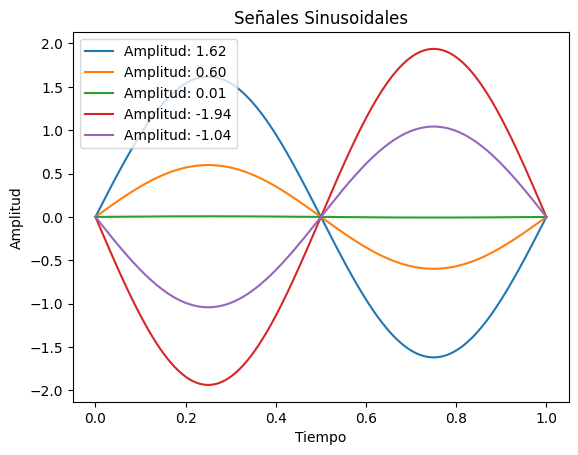

In [6]:
import numpy as np
import matplotlib.pyplot as plt


fr = 1
senales =5

amplitud= np.random.randn(1,5,senales) # Se forma una tridemensioanl


x= np.linspace(0,1,1000) #muestras= 1000


fig = plt.figure()


for i in range(senales):
    y= amplitud[0,0,i] * np.sin(2* np.pi * fr * x) #Hay que poner tipos semillas para que en las 3 dimensiones empice por el mismo , solo cambia el i
    plt.plot(x,y,label=f'Amplitud: {amplitud[0,0,i]:.2f}')

plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señales Sinusoidales")
plt.legend()
plt.show()

3. (30%) Cargue el conjunto de datos de dispositivos médicos desde el archivo CSV 'datos_dispositivos.csv' utilizando la biblioteca Pandas.
Realice un análisis exploratorio de los datos utilizando métodos y funciones de Pandas: 

- Muestre las primeras filas del DataFrame para entender su estructura.
- Verifique la información básica del DataFrame, como el número de filas y columnas, los tipos de datos de cada columna y la presencia de valores nulos.
- Filtre el dataframe según la clasificación de riesgo de los dispositivos y cree un nuevo dataframe para cada uno de ellos.
- Por medio de filtros y métodos de pandas identifique los diferentes fabricantes de los dispositivos de la bases de datos y cuantos dispositivos corresponden a cada uno de los fabricantes.

In [7]:
current = os.getcwd() 
current

'c:\\info_2\\parcial_2'

In [8]:
file = glob.glob(current+'/*.csv')
file

['c:\\info_2\\parcial_2\\datos_dispositivos.csv']

In [9]:
datos = pd.read_csv(file[0]) # Mirar como esta la lista separada
datos

,ID,Nombre_dispositivo,Fabricante,Clasificacion_riesgo
0,1,Monitor de signos vitales,MedTech,Bajo
1,2,Desfibrilador,LifeCare,Moderado
2,3,Electrocardiograma,CardioTech,Alto
3,4,Respirador,RespiraCorp,Bajo
4,5,Bomba de infusión,InfuseCo,Moderado
5,6,Monitor de gases en sangre,CardioTech,Alto
6,7,Bomba de insulina intravenosa,CardioTech,Alto
7,8,Monitor de ritmo cardíaco,CardioTech,Bajo
8,9,Monitor de signos vitales neonatal,MedTech,Bajo
9,10,Monitor de gases en sangre,RespiraCorp,Bajo


In [10]:
datos.shape

(30, 4)

In [11]:
datos.loc[0],datos.loc[1],datos.loc[2],datos.loc[3] #Por fila

(ID                                              1
 Nombre_dispositivo      Monitor de signos vitales
 Fabricante                                MedTech
 Clasificacion_riesgo                         Bajo
 Name: 0, dtype: object,
 ID                                  2
 Nombre_dispositivo      Desfibrilador
 Fabricante                   LifeCare
 Clasificacion_riesgo         Moderado
 Name: 1, dtype: object,
 ID                                       3
 Nombre_dispositivo      Electrocardiograma
 Fabricante                      CardioTech
 Clasificacion_riesgo                  Alto
 Name: 2, dtype: object,
 ID                                4
 Nombre_dispositivo       Respirador
 Fabricante              RespiraCorp
 Clasificacion_riesgo           Bajo
 Name: 3, dtype: object)

In [12]:
datos['ID'].describe(),datos['Nombre_dispositivo'].describe(),datos['Fabricante'].describe(),datos['Clasificacion_riesgo'].describe()



(count    30.000000
 mean     15.500000
 std       8.803408
 min       1.000000
 25%       8.250000
 50%      15.500000
 75%      22.750000
 max      30.000000
 Name: ID, dtype: float64,
 count                       30
 unique                      21
 top       Desfibrilador manual
 freq                         4
 Name: Nombre_dispositivo, dtype: object,
 count          30
 unique          5
 top       MedTech
 freq            9
 Name: Fabricante, dtype: object,
 count       30
 unique       3
 top       Bajo
 freq        13
 Name: Clasificacion_riesgo, dtype: object)

In [13]:
datos.count()# NO NULOS , OSEA QUE NO HAY NINGUNA NULA

ID                      30
Nombre_dispositivo      30
Fabricante              30
Clasificacion_riesgo    30
dtype: int64

In [14]:
datos.isna() # NULOS

,ID,Nombre_dispositivo,Fabricante,Clasificacion_riesgo
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [15]:
datos_alto = datos[datos['Clasificacion_riesgo'] == 'Alto']
datos_alto


,ID,Nombre_dispositivo,Fabricante,Clasificacion_riesgo
2,3,Electrocardiograma,CardioTech,Alto
5,6,Monitor de gases en sangre,CardioTech,Alto
6,7,Bomba de insulina intravenosa,CardioTech,Alto
14,15,Monitor de constantes vitales,CardioTech,Alto
18,19,Bomba de infusión de medicamentos,CardioTech,Alto
22,23,Desfibrilador manual,LifeCare,Alto
26,27,Desfibrilador manual,MedTech,Alto
28,29,Bomba de perfusión de insulina,CardioTech,Alto


In [16]:
datos_moderado= datos[datos['Clasificacion_riesgo'] == 'Moderado']
datos_moderado


,ID,Nombre_dispositivo,Fabricante,Clasificacion_riesgo
1,2,Desfibrilador,LifeCare,Moderado
4,5,Bomba de infusión,InfuseCo,Moderado
12,13,Bomba de perfusión de insulina,CardioTech,Moderado
13,14,Monitor de presión intracraneal,RespiraCorp,Moderado
15,16,Desfibrilador manual,MedTech,Moderado
19,20,Desfibrilador externo automático,CardioTech,Moderado
20,21,Electrocardiógrafo ambulatorio,LifeCare,Moderado
25,26,Desfibrilador portátil,MedTech,Moderado
27,28,Monitor de glucosa continua,LifeCare,Moderado


In [17]:
datos_bajo = datos[datos['Clasificacion_riesgo'] == 'Bajo']
datos_bajo

,ID,Nombre_dispositivo,Fabricante,Clasificacion_riesgo
0,1,Monitor de signos vitales,MedTech,Bajo
3,4,Respirador,RespiraCorp,Bajo
7,8,Monitor de ritmo cardíaco,CardioTech,Bajo
8,9,Monitor de signos vitales neonatal,MedTech,Bajo
9,10,Monitor de gases en sangre,RespiraCorp,Bajo
10,11,Bomba de infusión de morfina,MedTech,Bajo
11,12,Electrocardiógrafo ambulatorio,InfuseCo,Bajo
16,17,Desfibrilador pediátrico,LifeCare,Bajo
17,18,Desfibrilador pediátrico,MedTech,Bajo
21,22,Desfibrilador manual,MedTech,Bajo


In [18]:
datos.sort_values(by ='Fabricante')

,ID,Nombre_dispositivo,Fabricante,Clasificacion_riesgo
14,15,Monitor de constantes vitales,CardioTech,Alto
2,3,Electrocardiograma,CardioTech,Alto
5,6,Monitor de gases en sangre,CardioTech,Alto
6,7,Bomba de insulina intravenosa,CardioTech,Alto
7,8,Monitor de ritmo cardíaco,CardioTech,Bajo
19,20,Desfibrilador externo automático,CardioTech,Moderado
12,13,Bomba de perfusión de insulina,CardioTech,Moderado
18,19,Bomba de infusión de medicamentos,CardioTech,Alto
28,29,Bomba de perfusión de insulina,CardioTech,Alto
4,5,Bomba de infusión,InfuseCo,Moderado


In [19]:
datos_fabri_cardiotech = datos[datos['Fabricante'] == 'CardioTech']
datos_fabri_cardiotech['Fabricante'].describe()

count              9
unique             1
top       CardioTech
freq               9
Name: Fabricante, dtype: object

In [20]:
datos_fabri_infuseco = datos[datos['Fabricante'] == 'InfuseCo']
datos_fabri_infuseco['Fabricante'].describe()

count            2
unique           1
top       InfuseCo
freq             2
Name: Fabricante, dtype: object

In [21]:
datos_fabri_lifecare = datos[datos['Fabricante'] == 'LifeCare']
datos_fabri_lifecare['Fabricante'].describe()

count            7
unique           1
top       LifeCare
freq             7
Name: Fabricante, dtype: object

In [22]:
datos_fabri_medtech = datos[datos['Fabricante'] == 'MedTech']
datos_fabri_medtech['Fabricante'].describe()

count           9
unique          1
top       MedTech
freq            9
Name: Fabricante, dtype: object

In [23]:
datos_fabri_respiracorp = datos[datos['Fabricante'] == 'RespiraCorp']
datos_fabri_respiracorp['Fabricante'].describe()

count               3
unique              1
top       RespiraCorp
freq                3
Name: Fabricante, dtype: object

**Éxitos y recuerden que la entrega del parcial se realiza subiendo este notebook a su repositorio de github.**